In [2]:
import jax
from jax import numpy as jnp
import time
import numpy as np

from jax import grad
from jax import random
from jax import device_put, jit
#jax.config.update("jax_enable_x64", True)

In [4]:
from methods.multilevel_ubu import multilevel_ubu,vmap_multilevel_ubu



niter=200
burnin=20
rep=256
gam=jnp.array(1.0)
r=4
c=1.0/16
maxlevel=8
max_parallel_chain=64




In [3]:
from methods.process_res_multi import process_res_multi
from methods.bootstrap_res import bootstrap_res
import pickle

M=4
@jax.jit
def grad_lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return Hessvec*x

@jax.jit
def test_function(x):
    return jnp.hstack([x,(jnp.sqrt(jnp.sum(jnp.square(x))))])

vmap_grad_lpost=jax.vmap(grad_lpost)
vmap_test_function=jax.vmap(test_function)
h=jnp.array(1.5)/jnp.sqrt(M)
key=random.key(93845798)
bootstrap_res_d=[]
ess_d=[]
grad_per_ess_d=[]
max_grad_per_ess_d=[]
max_grad_per_ess_sd_d=[]
grad_per_ess_norm_d=[]
grad_per_ess_norm_sd_d=[]
bootstrap_samp=64
par_batch=16
par_runs=16*4

for dit in range(5):
    nbeta=int(10**(dit+1))
    beta_min=jnp.zeros([1,nbeta])
    test_dim=nbeta+1
    key,subkey=random.split(key)
    keys=random.split(key,par_runs)
    res=vmap_multilevel_ubu(niter,burnin,rep,h,gam, vmap_grad_lpost, vmap_test_function, r,c,nbeta,test_dim,beta_min,maxlevel,max_parallel_chain, keys, par_batch)
    ess, grad_per_ess=process_res_multi(res,jnp.arange(rep))
    subkeys=random.split(subkey,bootstrap_samp)
    bootstrap_r=bootstrap_res(res,bootstrap_samp,par_runs,nbeta,process_res_multi,subkeys)
    bootstrap_res_d.append(bootstrap_r)
    ess_d.append(ess)
    grad_per_ess_d.append(grad_per_ess)
    max_grad_per_ess_d.append(jnp.max(grad_per_ess[0:nbeta]))
    max_grad_per_ess_sd_d.append(bootstrap_r[4])
    grad_per_ess_norm_d.append(grad_per_ess[nbeta])
    grad_per_ess_norm_sd_d.append(bootstrap_r[5])

with open('./output/Gaussian_kappa_4_UBUBU.pkl', 'wb') as file:
    pickle.dump((ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d),file)

#_=multilevel_ubu(niter,burnin,rep,h,gam, grad_lpost, test_function, r,c,nbeta,test_dim,beta_min,maxlevel,max_parallel_chain, 4,key)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2]
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.75 h/2: 0.375
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.375 h/2: 0.1875
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.1875 h/2: 0.09375
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.09375
Multi error: VmapTracer<float32[5]>
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.75 h/2: 0.375
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.375 h/2: 0.1875
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.1875 h/2: 0.09375
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.09375
Multi error: VmapTracer<float32[5]>
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.75 h/2: 0.375
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.375 h/2: 0.1875
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.1875 h/2: 0.09375
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.09375
Multi

In [4]:
from methods.process_res_multi import process_res_multi
from methods.bootstrap_res import bootstrap_res
import pickle

M=100
@jax.jit
def grad_lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return Hessvec*x

@jax.jit
def test_function(x):
    return jnp.hstack([x,(jnp.sqrt(jnp.sum(jnp.square(x))))])

vmap_grad_lpost=jax.vmap(grad_lpost)
vmap_test_function=jax.vmap(test_function)
h=jnp.array(1.5)/jnp.sqrt(M)
key=random.key(3457675)
bootstrap_res_d=[]
ess_d=[]
grad_per_ess_d=[]
max_grad_per_ess_d=[]
max_grad_per_ess_sd_d=[]
grad_per_ess_norm_d=[]
grad_per_ess_norm_sd_d=[]
bootstrap_samp=64
par_batch=16
par_runs=16*4

for dit in range(5):
    nbeta=int(10**(dit+1))
    beta_min=jnp.zeros([1,nbeta])
    test_dim=nbeta+1
    key,subkey=random.split(key)
    keys=random.split(key,par_runs)
    res=vmap_multilevel_ubu(niter,burnin,rep,h,gam, vmap_grad_lpost, vmap_test_function, r,c,nbeta,test_dim,beta_min,maxlevel,max_parallel_chain, keys, par_batch)
    ess, grad_per_ess=process_res_multi(res,jnp.arange(rep))
    subkeys=random.split(subkey,bootstrap_samp)
    bootstrap_r=bootstrap_res(res,bootstrap_samp,par_runs,nbeta,process_res_multi,subkeys)
    bootstrap_res_d.append(bootstrap_r)
    ess_d.append(ess)
    grad_per_ess_d.append(grad_per_ess)
    max_grad_per_ess_d.append(jnp.max(grad_per_ess[0:nbeta]))
    max_grad_per_ess_sd_d.append(bootstrap_r[4])
    grad_per_ess_norm_d.append(grad_per_ess[nbeta])
    grad_per_ess_norm_sd_d.append(bootstrap_r[5])

with open('./output/Gaussian_kappa_100_UBUBU.pkl', 'wb') as file:
    pickle.dump((ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d),file)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2]
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.15 h/2: 0.075
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.075 h/2: 0.0375
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.0375 h/2: 0.01875
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.01875
Multi error: VmapTracer<float32[5]>
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.15 h/2: 0.075
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.075 h/2: 0.0375
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.0375 h/2: 0.01875
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.01875
Multi error: VmapTracer<float32[5]>
Lev: 0 / 1 xn/x2n error: VmapTracer<float32[]>
h: 0.15 h/2: 0.075
Lev: 1 / 2 xn/x2n error: VmapTracer<float32[]>
h: 0.075 h/2: 0.0375
Lev: 2 / 3 xn/x2n error: VmapTracer<float32[]>
h: 0.0375 h/2: 0.01875
maxmultilevels: 4
multilevels: 0
Lev: 3 / 4 ...
hm: 0.01875
Multi

In [1]:
from methods.hmc import vmap_hmcsampler
from methods.process_res_hmc import process_res_hmc
from methods.bootstrap_res import bootstrap_res

import jax
from jax import random
from jax import numpy as jnp
import pickle

niter=2000
burnin=0
par_runs=256
partial=0.7


In [7]:
M=4
@jax.jit
def lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return jnp.sum(Hessvec*(x**2))/2

@jax.jit
def grad_lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return Hessvec*x

@jax.jit
def test_function(x):
    return jnp.hstack([x,(jnp.sqrt(jnp.sum(jnp.square(x))))])


numsteps_arr=[1,2,2,4,8]
h_arr=[1.3,0.7,0.42,0.25,0.15]
key=random.key(34567)
bootstrap_samp=256
chunk_size=64
bootstrap_res_d=[]
ess_d=[]
grad_per_ess_d=[]
max_grad_per_ess_d=[]
max_grad_per_ess_sd_d=[]
grad_per_ess_norm_d=[]
grad_per_ess_norm_sd_d=[]


for dit in range(5):
    nbeta=int(10**(dit+1))
    test_dim=nbeta+1
    key,subkey2=random.split(key)
    h=h_arr[dit]/jnp.sqrt(M)
    numsteps=numsteps_arr[dit]
    keys=random.split(key,par_runs)
    Hessvec=jnp.linspace(1,M,nbeta).reshape([1,nbeta])  
    sigmavec=Hessvec**(-0.5)
    x0=(jnp.ones([par_runs,1])@sigmavec)*random.normal(key,[par_runs,nbeta])
    res=vmap_hmcsampler(niter,burnin,numsteps,partial,h,lpost,grad_lpost,test_function,test_dim,x0,keys,chunk_size)
    print("dit:",dit,"Mean acc:",res[2].mean())
    subkey=random.split(subkey2,bootstrap_samp)
    ess,grad_per_ess=process_res_hmc(res,jnp.arange(par_runs))
    ess_d.append(ess)
    grad_per_ess_d.append(grad_per_ess)
    bootstrap_r=bootstrap_res(res,bootstrap_samp,par_runs,nbeta,process_res_hmc,subkey)
    bootstrap_res_d.append(bootstrap_r)
    max_grad_per_ess_d.append(jnp.max(grad_per_ess[0:nbeta]))
    max_grad_per_ess_sd_d.append(bootstrap_r[4])
    grad_per_ess_norm_d.append(grad_per_ess[nbeta])
    grad_per_ess_norm_sd_d.append(bootstrap_r[5])


with open('./output/Gaussian_kappa_4_RHMC.pkl', 'wb') as file:
    pickle.dump((ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d),file)

dit: 0 Mean acc: 0.7424004
dit: 1 Mean acc: 0.7191348
dit: 2 Mean acc: 0.7158321
dit: 3 Mean acc: 0.72252154
dit: 4 Mean acc: 0.7056895


In [8]:
M=100
@jax.jit
def lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return jnp.sum(Hessvec*(x**2))/2

@jax.jit
def grad_lpost(x):
    nbeta=x.shape[0]
    Hessvec=jnp.linspace(1,M,nbeta).reshape([nbeta,])  
    return Hessvec*x

@jax.jit
def test_function(x):
    return jnp.hstack([x,(jnp.sqrt(jnp.sum(jnp.square(x))))])

numsteps_arr=[4,8,15,33,59]
h_arr=[1.4,0.8,0.5,0.25,0.15]
key=random.key(34567)
bootstrap_samp=256
chunk_size=64
bootstrap_res_d=[]
ess_d=[]
grad_per_ess_d=[]
max_grad_per_ess_d=[]
max_grad_per_ess_sd_d=[]
grad_per_ess_norm_d=[]
grad_per_ess_norm_sd_d=[]


for dit in range(5):
    nbeta=int(10**(dit+1))
    test_dim=nbeta+1
    key,subkey2=random.split(key)
    h=h_arr[dit]/jnp.sqrt(M)
    numsteps=numsteps_arr[dit]
    keys=random.split(key,par_runs)
    Hessvec=jnp.linspace(1,M,nbeta).reshape([1,nbeta])  
    sigmavec=Hessvec**(-0.5)
    x0=(jnp.ones([par_runs,1])@sigmavec)*random.normal(key,[par_runs,nbeta])
    res=vmap_hmcsampler(niter,burnin,numsteps,partial,h,lpost,grad_lpost,test_function,test_dim,x0,keys,chunk_size)
    print("dit:",dit,"Mean acc:",res[2].mean())
    subkey=random.split(subkey2,bootstrap_samp)
    ess,grad_per_ess=process_res_hmc(res,jnp.arange(par_runs))
    ess_d.append(ess)
    grad_per_ess_d.append(grad_per_ess)
    bootstrap_r=bootstrap_res(res,bootstrap_samp,par_runs,nbeta,process_res_hmc,subkey)
    bootstrap_res_d.append(bootstrap_r)
    max_grad_per_ess_d.append(jnp.max(grad_per_ess[0:nbeta]))
    max_grad_per_ess_sd_d.append(bootstrap_r[4])
    grad_per_ess_norm_d.append(grad_per_ess[nbeta])
    grad_per_ess_norm_sd_d.append(bootstrap_r[5])


with open('./output/Gaussian_kappa_100_RHMC.pkl', 'wb') as file:
    pickle.dump((ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d),file)

dit: 0 Mean acc: 0.7164786
dit: 1 Mean acc: 0.7231758
dit: 2 Mean acc: 0.6732129
dit: 3 Mean acc: 0.7487793
dit: 4 Mean acc: 0.71962893


In [45]:
import pickle

with open('./output/Gaussian_kappa_4_UBUBU.pkl', 'rb') as file:
    (_,_,_,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d)=pickle.load(file)

with open('./output/Gaussian_kappa_4_RHMC.pkl', 'rb') as file:
    (_,_,_,max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2)=pickle.load(file)
# max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2

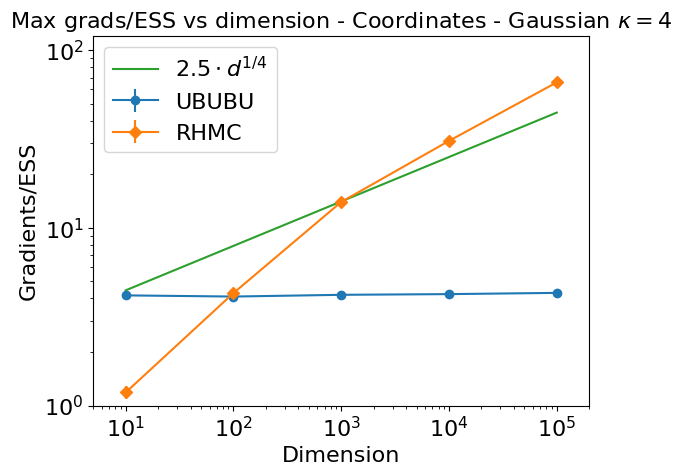

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x=np.asarray([10,10**2,10**3,10**4,10**5],dtype=float)
plt.title(r'Max grads/ESS vs dimension - Coordinates - Gaussian $\kappa=4$',fontsize=16)
plt.xscale('log') 
plt.yscale('log') 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(5,2*10**5)
plt.ylim(1,120)
plt.xlabel('Dimension',fontsize=16)
plt.ylabel('Gradients/ESS',fontsize=16)
plt.errorbar(x, y=max_grad_per_ess_d, yerr=max_grad_per_ess_sd_d, fmt='-o',label='UBUBU')
plt.errorbar(x, y=max_grad_per_ess_d2, yerr=max_grad_per_ess_sd_d2, fmt='-D',label='RHMC')
plt.plot(x,2.5*x**(0.25),label=r'$2.5\cdot d^{1/4}$')
plt.legend(loc='upper left',fontsize=16)
plt.savefig("./output/Gaussian_coordinates_kappa4.pdf", format="pdf",bbox_inches='tight') 
plt.show()



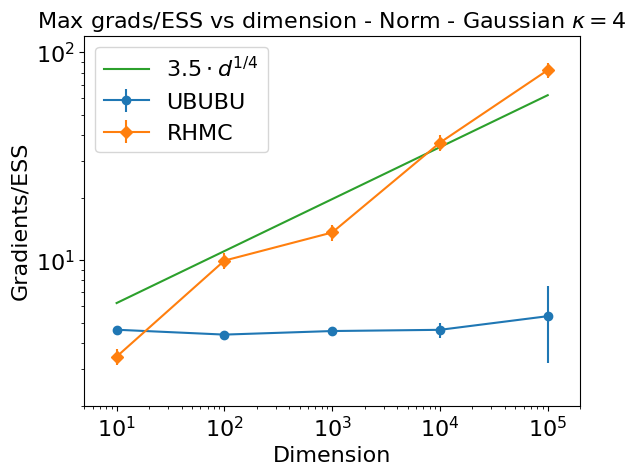

In [47]:
fig = plt.figure()
x=np.asarray([10,10**2,10**3,10**4,10**5],dtype=float)
plt.title(r'Max grads/ESS vs dimension - Norm - Gaussian $\kappa=4$',fontsize=16)
plt.xscale('log') 
plt.yscale('log') 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(5,2*10**5)
plt.ylim(2,120)
plt.xlabel('Dimension',fontsize=16)
plt.ylabel('Gradients/ESS',fontsize=16)
plt.errorbar(x, y=grad_per_ess_norm_d, yerr=grad_per_ess_norm_sd_d, fmt='-o',label='UBUBU')
plt.errorbar(x, y=grad_per_ess_norm_d2, yerr=grad_per_ess_norm_sd_d2, fmt='-D',label='RHMC')
plt.plot(x,3.5*x**(0.25),label=r'$3.5\cdot d^{1/4}$')
plt.legend(loc='upper left',fontsize=16)
plt.savefig("./output/Gaussian_norm_kappa4.pdf", format="pdf",bbox_inches='tight') 
plt.show()


In [48]:
import pickle

with open('./output/Gaussian_kappa_100_UBUBU.pkl', 'rb') as file:
    (_,_,_,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d)=pickle.load(file)

with open('./output/Gaussian_kappa_100_RHMC.pkl', 'rb') as file:
    (_,_,_,max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2)=pickle.load(file)
# max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2

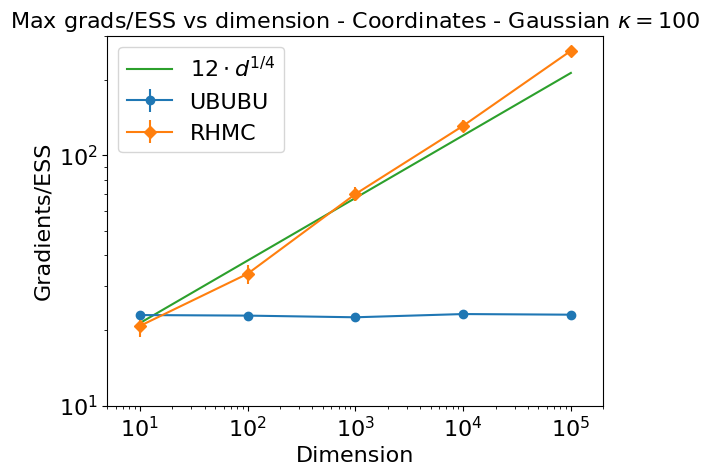

In [49]:
fig = plt.figure()
x=np.asarray([10,10**2,10**3,10**4,10**5],dtype=float)
plt.title(r'Max grads/ESS vs dimension - Coordinates - Gaussian $\kappa=100$',fontsize=16)
plt.xscale('log') 
plt.yscale('log') 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(5,2*10**5)
plt.ylim(10,300)
plt.xlabel('Dimension',fontsize=16)
plt.ylabel('Gradients/ESS',fontsize=16)
plt.errorbar(x, y=max_grad_per_ess_d, yerr=max_grad_per_ess_sd_d, fmt='-o',label='UBUBU')
plt.errorbar(x, y=max_grad_per_ess_d2, yerr=max_grad_per_ess_sd_d2, fmt='-D',label='RHMC')
plt.plot(x,12*x**(0.25),label=r'$12\cdot d^{1/4}$')
plt.legend(loc='upper left',fontsize=16)
plt.savefig("./output/Gaussian_coordinates_kappa100.pdf", format="pdf",bbox_inches='tight') 
plt.show()

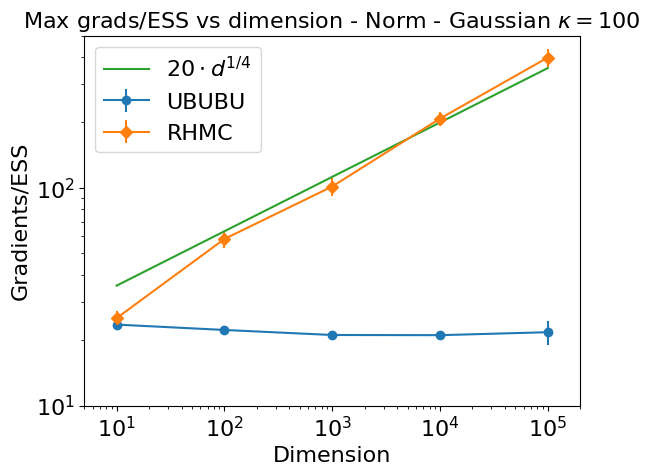

In [50]:
fig = plt.figure()
x=np.asarray([10,10**2,10**3,10**4,10**5],dtype=float)
plt.title(r'Max grads/ESS vs dimension - Norm - Gaussian $\kappa=100$',fontsize=16)
plt.xscale('log') 
plt.yscale('log') 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(5,2*10**5)
plt.ylim(10,500)
plt.xlabel('Dimension',fontsize=16)
plt.ylabel('Gradients/ESS',fontsize=16)
plt.errorbar(x, y=grad_per_ess_norm_d, yerr=grad_per_ess_norm_sd_d, fmt='-o',label='UBUBU')
plt.errorbar(x, y=grad_per_ess_norm_d2, yerr=grad_per_ess_norm_sd_d2, fmt='-D',label='RHMC')
plt.plot(x,20*x**(0.25),label=r'$20\cdot d^{1/4}$')
plt.legend(loc='upper left',fontsize=16)
plt.savefig("./output/Gaussian_norm_kappa100.pdf", format="pdf",bbox_inches='tight') 
plt.show()


In [17]:
import pickle

with open('./output/Gaussian_kappa_4_UBUBU.pkl', 'rb') as file:
    (ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d)=pickle.load(file)

with open('./output/Gaussian_kappa_4_RHMC.pkl', 'rb') as file:
    (ess_d2, grad_per_ess_d2,bootstrap_res_d2,max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2)=pickle.load(file)


<Figure size 640x480 with 0 Axes>

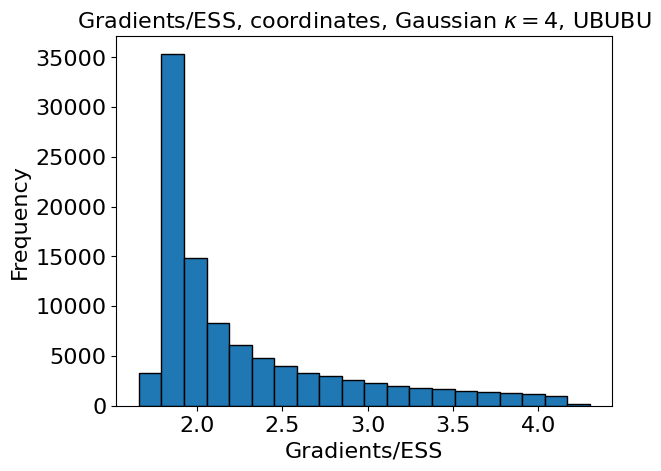

In [19]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel("Gradients/ESS", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(r"Gradients/ESS, coordinates, Gaussian $\kappa=4$, UBUBU",fontsize=16)
nbeta=100000
plt.hist(grad_per_ess_d[4][0:nbeta],bins=20,histtype='bar',edgecolor='black')
plt.savefig("./output/UBUBU_Gaussian_coordinates_kappa_4.pdf", format="pdf",bbox_inches='tight') 
plt.show()

<Figure size 640x480 with 0 Axes>

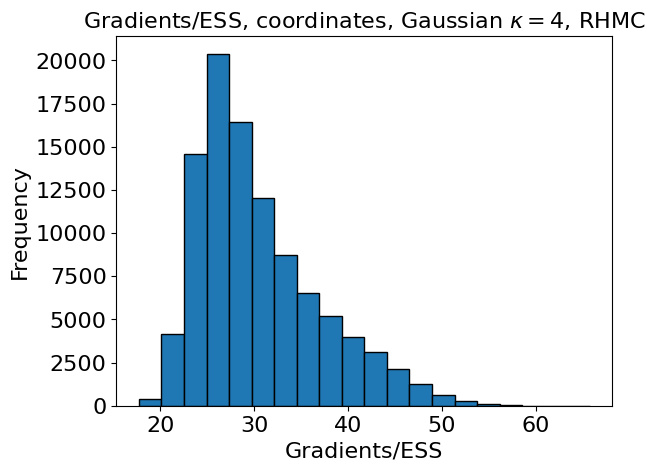

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel("Gradients/ESS", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title(r"Gradients/ESS, coordinates, Gaussian $\kappa=4$, RHMC",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
nbeta=100000
plt.hist(grad_per_ess_d2[4][0:nbeta],bins=20,histtype='bar',edgecolor='black')
plt.savefig("./output/RHMC_Gaussian_coordinates_kappa_4.pdf", format="pdf",bbox_inches='tight') 
plt.show()

In [21]:
import pickle

with open('./output/Gaussian_kappa_100_UBUBU.pkl', 'rb') as file:
    (ess_d, grad_per_ess_d,bootstrap_res_d,max_grad_per_ess_d,max_grad_per_ess_sd_d,grad_per_ess_norm_d,grad_per_ess_norm_sd_d)=pickle.load(file)

with open('./output/Gaussian_kappa_100_RHMC.pkl', 'rb') as file:
    (ess_d2, grad_per_ess_d2,bootstrap_res_d2,max_grad_per_ess_d2,max_grad_per_ess_sd_d2,grad_per_ess_norm_d2,grad_per_ess_norm_sd_d2)=pickle.load(file)


<Figure size 640x480 with 0 Axes>

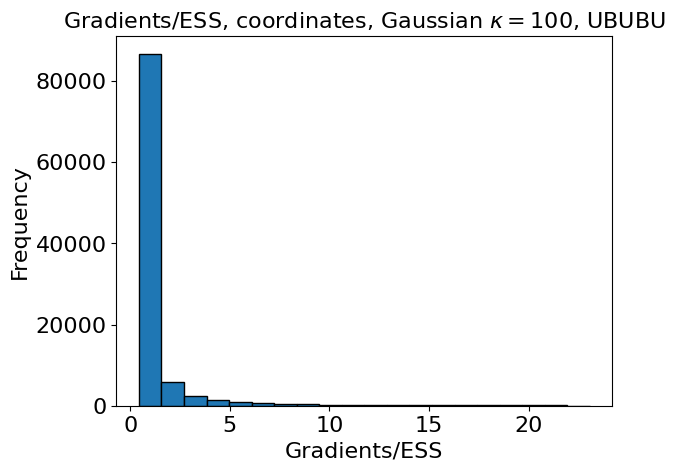

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel("Gradients/ESS", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title(r"Gradients/ESS, coordinates, Gaussian $\kappa=100$, UBUBU",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
nbeta=100000
plt.hist(grad_per_ess_d[4][0:nbeta],bins=20,histtype='bar',edgecolor='black')
plt.savefig("./output/UBUBU_Gaussian_coordinates_kappa_100.pdf", format="pdf",bbox_inches='tight') 
plt.show()

<Figure size 640x480 with 0 Axes>

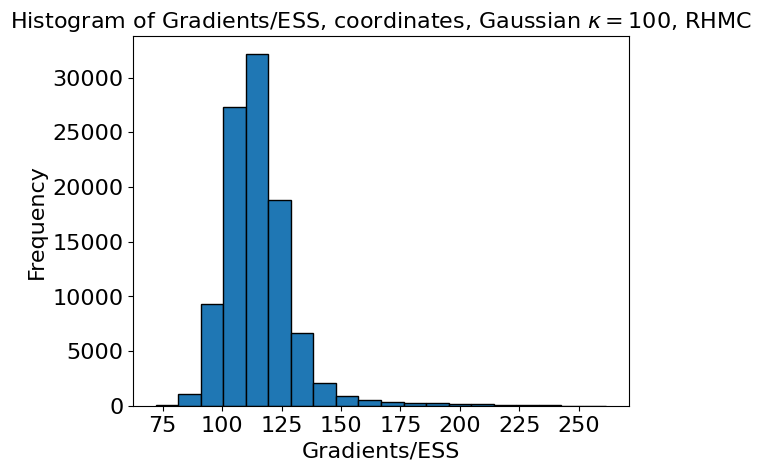

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlabel("Gradients/ESS", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title(r"Histogram of Gradients/ESS, coordinates, Gaussian $\kappa=100$, RHMC",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
nbeta=100000
plt.hist(grad_per_ess_d2[4][0:nbeta],bins=20,histtype='bar',edgecolor='black')
plt.savefig("./output/RHMC_Gaussian_coordinates_kappa_100.pdf", format="pdf",bbox_inches='tight') 
plt.show()